In [17]:
import tensorflow as tf
# from tensorflow import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 as cf10

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [18]:
# Verificar si TensorFlow detecta la GPU
if tf.config.list_physical_devices('GPU'):
    print("GPU detectada y utilizada para el entrenamiento.")
else:
    print("No se detectó GPU. Asegúrate de que los drivers y CUDA estén instalados correctamente.")

# Opcional: Configurar el uso de memoria de la GPU para evitar errores de asignación
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Configuración de memoria de GPU completada.")
    except RuntimeError as e:
        print(e)

No se detectó GPU. Asegúrate de que los drivers y CUDA estén instalados correctamente.


In [19]:
# Cargar las imagenes de entrenamiento y prueba
(train_images, train_labels), (test_images, test_labels) = cf10.load_data()

In [20]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [21]:
"""
    Muestra una cuadrícula de imágenes de muestra del conjunto de datos de entrenamiento.
    
    Parámetros:
    train_images: Array de imágenes de entrenamiento.
    class_names: Lista de nombres de clases correspondientes a las etiquetas.
    train_labels: Array de etiquetas de entrenamiento.
    nb_samples: Número de imágenes a mostrar.
    nb_row: Número de filas en la cuadrícula.
"""
def show_images(train_images, class_names, train_labels, nb_samples = 12, nb_row = 4):
    plt.figure(figsize=(10, 10))
    for i in range(nb_samples):
        plt.subplot(nb_row, nb_row, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

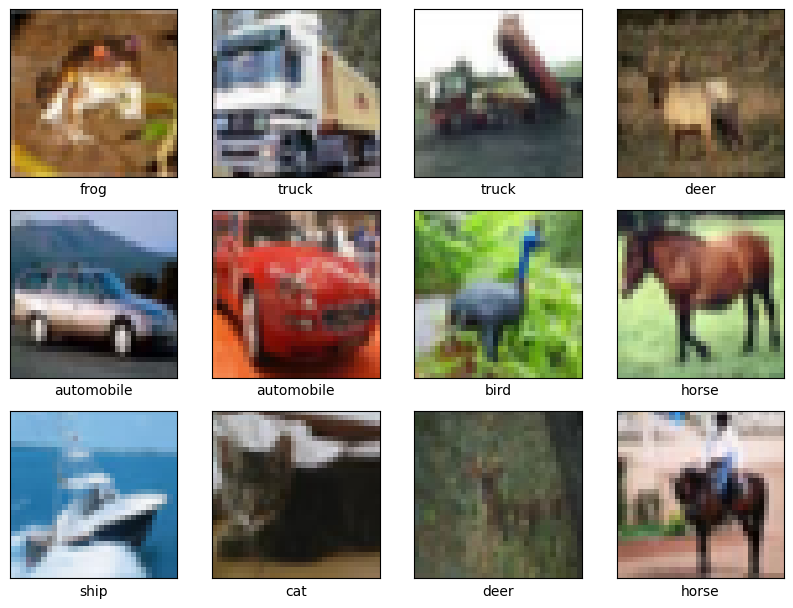

In [22]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
show_images(train_images, class_names, train_labels)

In [23]:
# Normalizar las imagenes
max_value = 255

train_images = train_images / max_value
test_images = test_images / max_value

# Codificacion one-hot de las etiquetas
train_labels = tf.keras.utils.to_categorical(train_labels, len(class_names))
test_labels = tf.keras.utils.to_categorical(test_labels, len(class_names))

train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 10), (10000, 10))

In [24]:
# Variables de entrada
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECTED = 128
NUM_CLASSES = len(class_names)

# Crear el modelo
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(POOL_SHAPE))
model.add(tf.keras.layers.Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(POOL_SHAPE))
model.add(tf.keras.layers.Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(POOL_SHAPE))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(FULLY_CONNECTED, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax'))


c:\Users\crist\Documents\Samsung-Innovation-Campus\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,506 (353.54 KB)

 Trainable params: 90,506 (353.54 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
BATCH_SIZE = 64
EPOCHS = 30

METRICS = ['accuracy', tf.keras.metrics.Recall(name='precision'), tf.keras.metrics.Precision(name='recall')]

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=METRICS)

training_history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(test_images, test_labels))

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.2740 - loss: 1.9339 - precision: 0.0479 - recall: 0.5176 - val_accuracy: 0.4845 - val_loss: 1.4113 - val_precision: 0.2372 - val_recall: 0.7014
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.4805 - loss: 1.4296 - precision: 0.2490 - recall: 0.6868 - val_accuracy: 0.5719 - val_loss: 1.1962 - val_precision: 0.3648 - val_recall: 0.7629
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5511 - loss: 1.2576 - precision: 0.3548 - recall: 0.7296 - val_accuracy: 0.6093 - val_loss: 1.1076 - val_precision: 0.4363 - val_recall: 0.7612
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5963 - loss: 1.1490 - precision: 0.4204 - recall: 0.7530 - val_accuracy: 0.6384 - val_loss: 1.0169 - val_precision: 0.4749 - val_recall: 0.7860
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6255 - loss: 1.0594 - precision: 0.4735 - recall: 0.7689 - val_accuracy: 0.6608 - va

In [27]:
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_images, test_labels)

print(f'Perdida: {test_loss}')
print(f'Accuracy: {test_accuracy}')
print(f'Precision: {test_precision}')
print(f'Recall: {test_recall}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7253 - loss: 0.9543 - precision: 0.6800 - recall: 0.7697
Perdida: 0.978994607925415
Accuracy: 0.7168999910354614
Precision: 0.6761999726295471
Recall: 0.7651917934417725


In [28]:
def show_performnce_curve(training_result, metric, metric_label):

    training_performance = training_result.history[str(metric)]
    validation_performance = training_result.history[f'val_{metric}']
    intersection_idx = np.argwhere(np.isclose(training_performance, validation_performance, atol=0.01)).flatten()[0]

    intersection_value = training_performance[intersection_idx]

    plt.plot(training_performance, label=metric_label)
    plt.plot(validation_performance, label=f'val_{metric}')
    plt.axvline(intersection_idx, color='gray', linestyle='--', label=f'Intersection: {intersection_value}')
    plt.annotate(f'Valor Optimo: {intersection_value}', xy=(intersection_idx, intersection_value), xycoords='data', fontsize = 10, ha='center', color='blue')

    plt.xlabel('Epoca')
    plt.ylabel(metric_label)
    plt.legend(loc='lower right')

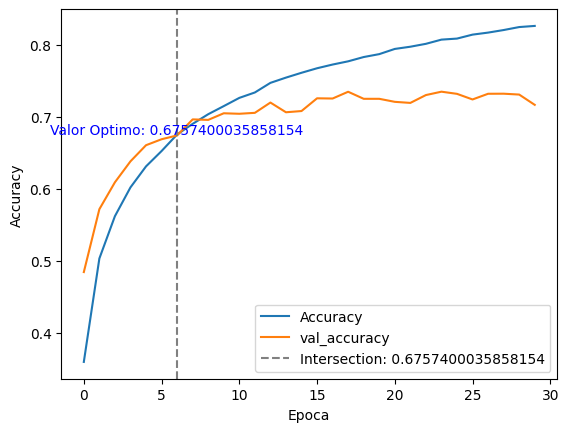

In [29]:
show_performnce_curve(training_history, 'accuracy', 'Accuracy')

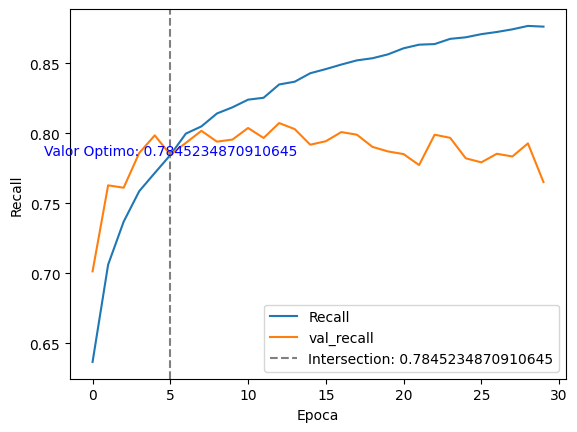

In [30]:
show_performnce_curve(training_history, 'recall', 'Recall')

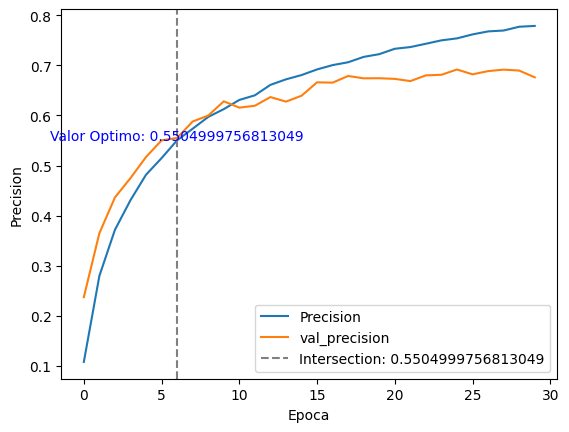

In [31]:
show_performnce_curve(training_history, 'precision', 'Precision')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


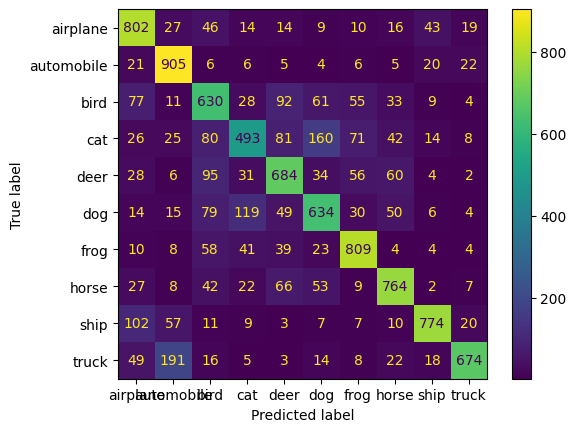

In [32]:
test_prediction = model.predict(test_images)
test_prediction_labels = np.argmax(test_prediction, axis=1)

test_true_labels = np.argmax(test_labels, axis=1)

cf_matrix = confusion_matrix(test_true_labels, test_prediction_labels)

confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=class_names)

confusion_matrix_display.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()